In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
import src.util as util
import yaml
import copy
from tqdm import tqdm
import os
from datetime import datetime
import openpyxl
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import shap


/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config_data=util.config_load()

In [4]:
data_combined_Fe=util.pickle_load(config_data["raw_dataset_path_data_combined"])


In [5]:
data_combined_Fe.columns

Index(['Provider', 'Clm_cnt_Provider_BeneID',
       'Clm_cnt_Provider_AttendingPhysician',
       'Clm_cnt_Provider_OtherPhysician',
       'Clm_cnt_Provider_OperatingPhysician',
       'Clm_cnt_Provider_ClmAdmitDiagnosisCode',
       'Clm_cnt_Provider_ClmProcedureCode_1',
       'Clm_cnt_Provider_ClmProcedureCode_2',
       'Clm_cnt_Provider_ClmProcedureCode_3',
       'Clm_cnt_Provider_ClmDiagnosisCode_1',
       ...
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'DOD_Flag'],
      dtype='object', length=116)

In [6]:
df_set1_level_1=data_combined_Fe.copy()

In [7]:
columns=['Provider','Clm_cnt_Provider_BeneID',
'Clm_cnt_Provider_OperatingPhysician',
'Clm_cnt_Provider_ClmDiagnosisCode_9',
'Clm_cnt_Provider_ClmDiagnosisCode_10',
'Clm_cnt_Provider_DiagnosisGroupCode',
'Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1',
'PRV_TotalInscClaimAmtReimbursed']

**Subset the clusters**

In [8]:
df_set1_level_1=df_set1_level_1[columns]

In [9]:
scaler=RobustScaler()
scaled_data_level1=scaler.fit_transform(df_set1_level_1.drop(['Provider'],axis=1))

In [10]:
scaled_data_level1

array([[22.45454545, 19.58823529, 17.        , ..., 17.6       ,
        10.        , 16.8460021 ],
       [ 8.66233766,  7.17647059,  6.42857143, ...,  5.8       ,
         4.        ,  6.02188521],
       [22.92207792, 16.23529412,  8.14285714, ...,  0.        ,
         0.        ,  5.94544109],
       ...,
       [-0.27272727, -0.17647059, -0.28571429, ...,  0.        ,
         0.        , -0.21052956],
       [-0.38961039, -0.41176471, -0.28571429, ...,  0.        ,
         0.        , -0.24295666],
       [-0.38961039, -0.41176471, -0.14285714, ...,  0.        ,
         0.        , -0.24295666]])

In [11]:
df_scaled_data_level1=pd.DataFrame(scaled_data_level1,columns=df_set1_level_1.drop(['Provider'],axis=1).columns)

In [12]:
df_scaled_data_level1.fillna(0,inplace=True)

In [13]:
df_set1_level_1

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed
0,PRV57172,1760,340.0,121.0,14.0,88.0,10.0,1386100
1,PRV55158,698,129.0,47.0,2.0,29.0,4.0,508210
2,PRV54966,1796,283.0,59.0,5.0,0.0,0.0,502010
3,PRV54890,77,12.0,7.0,1.0,4.0,2.0,74320
4,PRV52145,245,40.0,4.0,1.0,0.0,0.0,60910
...,...,...,...,...,...,...,...,...
5405,PRV54294,1,1.0,0.0,0.0,0.0,0.0,60
5406,PRV51053,1,1.0,1.0,0.0,1.0,1.0,8000
5407,PRV55405,10,4.0,0.0,0.0,0.0,0.0,2730
5408,PRV57061,1,0.0,0.0,0.0,0.0,0.0,100


**Elbow Method**

/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


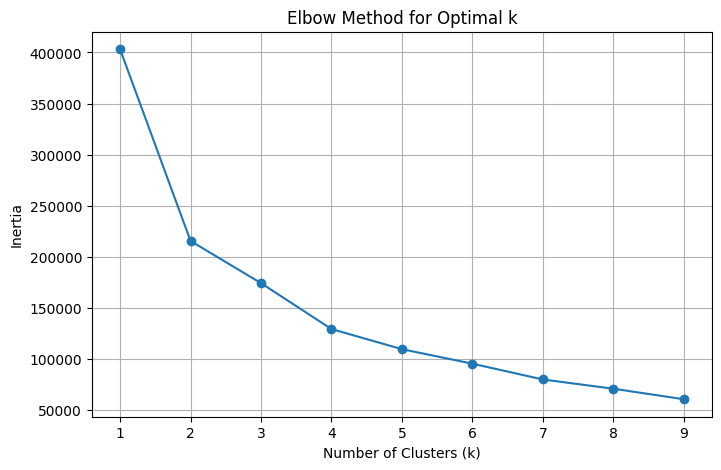

In [14]:
inertia=[]
k_values=range(1,10)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled_data_level1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()


In [16]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit_predict(df_scaled_data_level1)
df_scaled_data_level1['Cluster']=clusters
df_scaled_data_level1['Cluster']=clusters

In [17]:
df_scaled_data_level1['Cluster'].head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Cluster, dtype: int32

In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled_data_level1, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8682654419352358


In [19]:
df_scaled_data_level1

,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Cluster
0,22.454545,19.588235,17.000000,14.0,17.6,10.0,16.846002,1
1,8.662338,7.176471,6.428571,2.0,5.8,4.0,6.021885,0
2,22.922078,16.235294,8.142857,5.0,0.0,0.0,5.945441,1
3,0.597403,0.294118,0.714286,1.0,0.8,2.0,0.672153,0
4,2.779221,1.941176,0.285714,1.0,0.0,0.0,0.506812,0
...,...,...,...,...,...,...,...,...
5405,-0.389610,-0.352941,-0.285714,0.0,0.0,0.0,-0.243450,0
5406,-0.389610,-0.352941,-0.142857,0.0,0.2,1.0,-0.145552,0
5407,-0.272727,-0.176471,-0.285714,0.0,0.0,0.0,-0.210530,0
5408,-0.389610,-0.411765,-0.285714,0.0,0.0,0.0,-0.242957,0


In [20]:
df_scaled_data_level1.drop(columns='Cluster',inplace=True)

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler



# Fit Isolation Forest
model = IsolationForest(contamination=0.1,n_estimators=3000)  # Adjust contamination rate as needed
model.fit(df_scaled_data_level1)

anomaly_scores = model.decision_function(df_scaled_data_level1)
# Predict anomalies
anomalies = model.predict(df_scaled_data_level1)

# -1 for anomaly, 1 for normal
anomaly_indices = np.where(anomalies == -1)[0]
anomalous_data = df_scaled_data_level1.iloc[anomaly_indices]
anomalous_data_actual = df_set1_level_1.iloc[anomaly_indices]
df_set1_level_1['Anomaly_ind']=anomalies
df_scaled_data_level1['Anomaly_ind']=anomalies
df_set1_level_1['Anomaly_score']=anomaly_scores
df_scaled_data_level1['Anomaly_score']=anomaly_scores

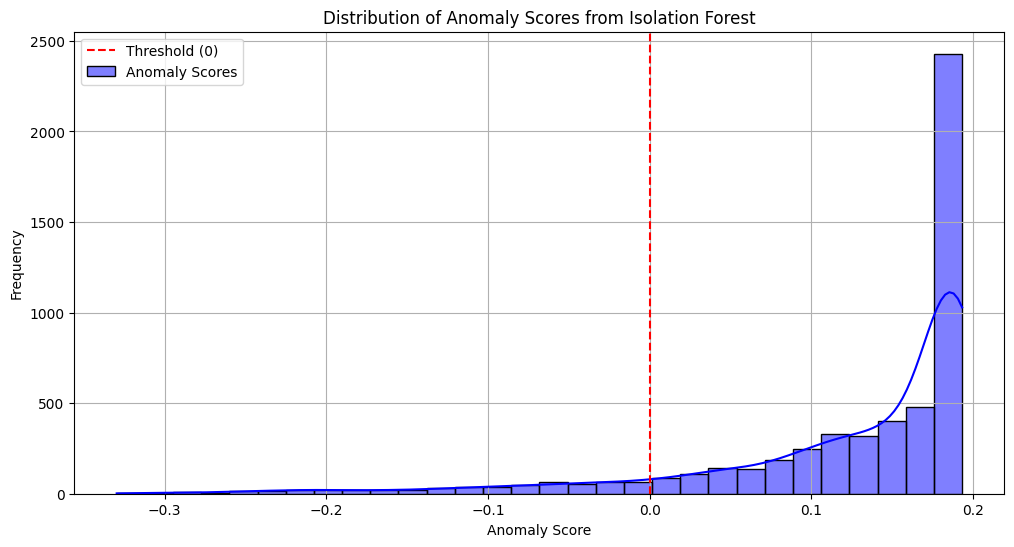

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(anomaly_scores, bins=30, kde=True, color='blue', label='Anomaly Scores')
plt.axvline(x=0, color='red', linestyle='--', label='Threshold (0)')
plt.title('Distribution of Anomaly Scores from Isolation Forest')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

In [24]:
# df_scaled_data_level1['Anomaly_ind'] = df_scaled_data_level1['Anomaly_ind'].apply(lambda x: 1 if x == -1 else 0)
# df_set1_level_1['Anomaly_ind'] = df_set1_level_1['Anomaly_ind'].apply(lambda x: 1 if x == -1 else 0)
df_scaled_data_level1['Anomaly_ind'] = df_scaled_data_level1['Anomaly_score'].apply(lambda x: 1 if x <= -0.02 else 0)
df_set1_level_1['Anomaly_ind'] = df_set1_level_1['Anomaly_score'].apply(lambda x: 1 if x <=-0.02 else 0)

In [25]:
dataset_anom=df_set1_level_1[df_set1_level_1.Anomaly_ind==1]
dataset_normal=df_set1_level_1[df_set1_level_1.Anomaly_ind==0]
dataset_anom_scale=df_scaled_data_level1[df_scaled_data_level1.Anomaly_ind==1]
dataset_normal_scale=df_scaled_data_level1[df_scaled_data_level1.Anomaly_ind==0]

In [26]:
dataset_anom

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score
0,PRV57172,1760,340.0,121.0,14.0,88.0,10.0,1386100,1,-0.261794
1,PRV55158,698,129.0,47.0,2.0,29.0,4.0,508210,1,-0.111097
2,PRV54966,1796,283.0,59.0,5.0,0.0,0.0,502010,1,-0.181251
6,PRV54986,618,164.0,118.0,13.0,153.0,15.0,1693410,1,-0.250637
10,PRV54894,229,96.0,98.0,9.0,138.0,21.0,1757060,1,-0.233167
...,...,...,...,...,...,...,...,...,...,...
3638,PRV52868,110,36.0,28.0,2.0,42.0,4.0,434120,1,-0.031089
3667,PRV56134,62,37.0,43.0,5.0,62.0,11.0,768000,1,-0.132745
4030,PRV57481,62,43.0,47.0,7.0,62.0,6.0,776000,1,-0.110199
4127,PRV55509,39,21.0,17.0,1.0,28.0,6.0,362510,1,-0.035727


In [27]:
X=df_scaled_data_level1.drop(columns='Anomaly_ind')
y=df_scaled_data_level1['Anomaly_ind']

/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


0.5793835520744324


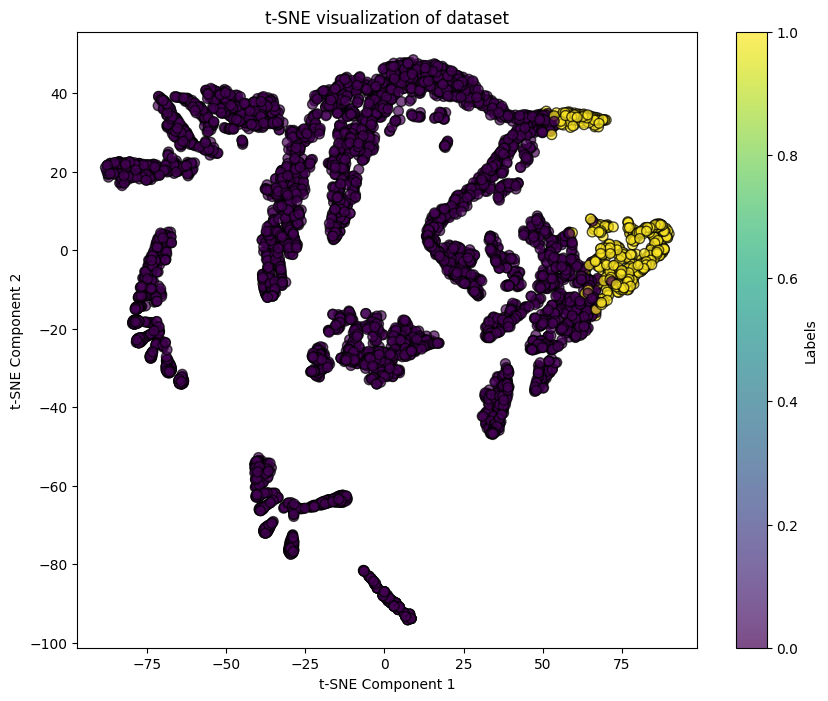

In [28]:
from sklearn.manifold import TSNE
# Create a t-SNE instance and fit_transform the data
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=3000)
X_tsne = tsne.fit_transform(X)
print(tsne.kl_divergence_)

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y,cmap='viridis', alpha=0.7, edgecolors='k', s=50)

# Add legend and title
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Labels')

plt.show()

In [30]:
clusters=df_scaled_data_level1['Anomaly_ind'].values


In [31]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled_data_level1, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.802245264456443


In [32]:
df_scaled_data_level1

,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score
0,22.454545,19.588235,17.000000,14.0,17.6,10.0,16.846002,1,-0.261794
1,8.662338,7.176471,6.428571,2.0,5.8,4.0,6.021885,1,-0.111097
2,22.922078,16.235294,8.142857,5.0,0.0,0.0,5.945441,1,-0.181251
3,0.597403,0.294118,0.714286,1.0,0.8,2.0,0.672153,0,0.092600
4,2.779221,1.941176,0.285714,1.0,0.0,0.0,0.506812,0,0.099198
...,...,...,...,...,...,...,...,...,...
5405,-0.389610,-0.352941,-0.285714,0.0,0.0,0.0,-0.243450,0,0.188016
5406,-0.389610,-0.352941,-0.142857,0.0,0.2,1.0,-0.145552,0,0.123094
5407,-0.272727,-0.176471,-0.285714,0.0,0.0,0.0,-0.210530,0,0.190331
5408,-0.389610,-0.411765,-0.285714,0.0,0.0,0.0,-0.242957,0,0.187053


In [33]:
if_model_pickled_prv=util.pickle_dump(model,config_data['if_prv_model'])

**SHAP FOR INTERPRETATION**

In [34]:
explainer=shap.TreeExplainer(model)
shap_values=explainer(dataset_anom.drop(columns=['Provider','Anomaly_ind','Anomaly_score'],axis=1),check_additivity=False)
#shap_values_norm=explainer(dataset_normal)


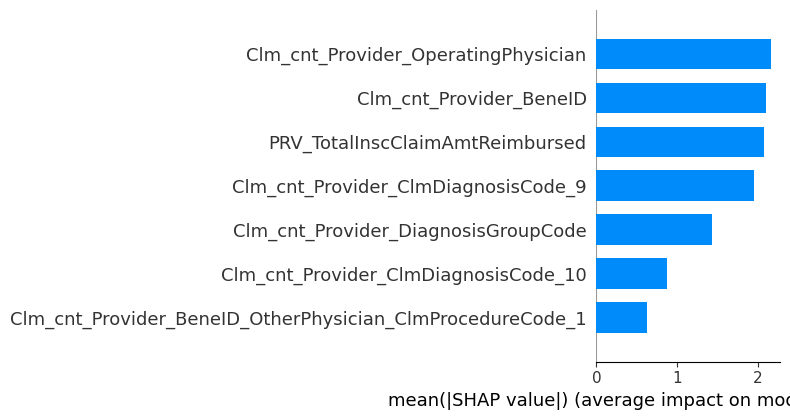

In [35]:
shap.summary_plot(shap_values, plot_type='bar')

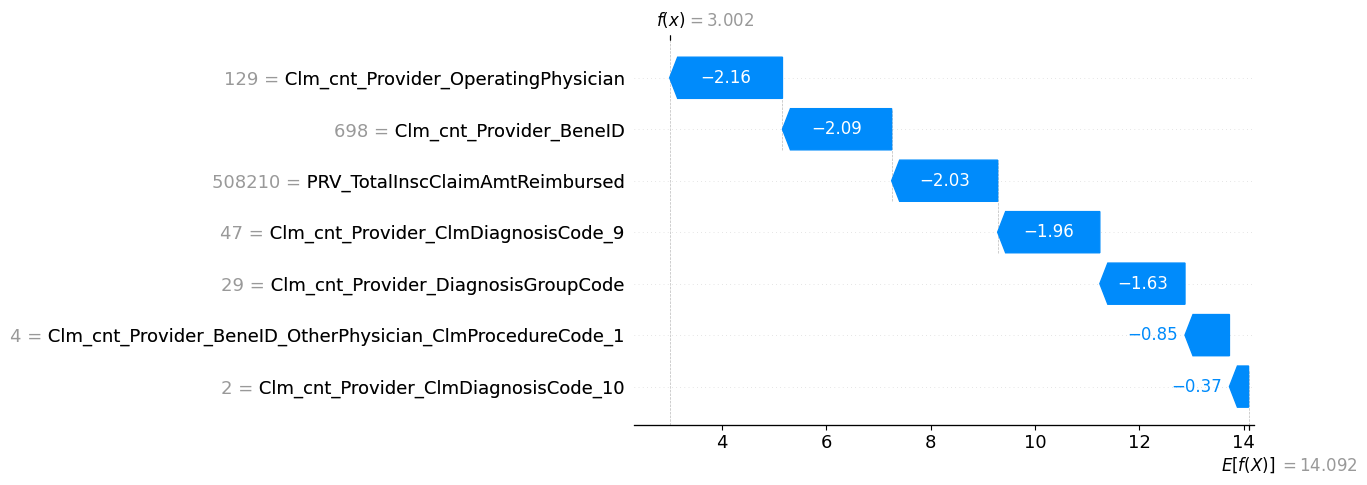

In [36]:
shap.plots.waterfall(shap_values[1])

In [37]:
dataset_anom

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score
0,PRV57172,1760,340.0,121.0,14.0,88.0,10.0,1386100,1,-0.261794
1,PRV55158,698,129.0,47.0,2.0,29.0,4.0,508210,1,-0.111097
2,PRV54966,1796,283.0,59.0,5.0,0.0,0.0,502010,1,-0.181251
6,PRV54986,618,164.0,118.0,13.0,153.0,15.0,1693410,1,-0.250637
10,PRV54894,229,96.0,98.0,9.0,138.0,21.0,1757060,1,-0.233167
...,...,...,...,...,...,...,...,...,...,...
3638,PRV52868,110,36.0,28.0,2.0,42.0,4.0,434120,1,-0.031089
3667,PRV56134,62,37.0,43.0,5.0,62.0,11.0,768000,1,-0.132745
4030,PRV57481,62,43.0,47.0,7.0,62.0,6.0,776000,1,-0.110199
4127,PRV55509,39,21.0,17.0,1.0,28.0,6.0,362510,1,-0.035727


In [39]:
dataset_anom_prv=dataset_anom.merge(data_combined_Fe['Provider'],on='Provider',how='inner')

In [40]:
dataset_anom_rank_sorted=dataset_anom_prv.sort_values(by='Anomaly_score',ascending=True)

In [41]:
dataset_anom_rank_sorted['Rank']=range(1,len(dataset_anom_rank_sorted)+1)

In [43]:
dataset_anom_rank_sorted

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score,Rank
44,PRV52019,1961,555.0,383.0,51.0,516.0,72.0,5996050,1,-0.329684,1
89,PRV56560,2313,514.0,218.0,29.0,248.0,37.0,3212000,1,-0.326023,2
5,PRV55215,3393,671.0,212.0,33.0,143.0,14.0,2284560,1,-0.314229,3
170,PRV56416,1592,361.0,182.0,24.0,214.0,28.0,2744870,1,-0.312853,4
130,PRV55462,1907,506.0,299.0,36.0,386.0,0.0,4713830,1,-0.310000,5
...,...,...,...,...,...,...,...,...,...,...,...
289,PRV57101,263,52.0,29.0,4.0,30.0,1.0,369680,1,-0.020539,466
352,PRV54090,190,50.0,22.0,2.0,32.0,4.0,320740,1,-0.020510,467
456,PRV54925,122,41.0,30.0,3.0,39.0,0.0,478870,1,-0.020359,468
31,PRV51017,515,95.0,17.0,1.0,0.0,2.0,142720,1,-0.020199,469


In [44]:
util.pickle_dump(dataset_anom_rank_sorted,config_data['raw_dataset_path_if_amt_rank'])

**LOCAL OUTLIER FACTOR**

In [53]:
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF
lof = LocalOutlierFactor(n_neighbors=5,contamination=0.1)
anomalies = lof.fit_predict(df_scaled_data_level1)
lof_scores = lof.negative_outlier_factor_  # Invert for easier interpretation
lof_scores = lof_scores.reshape(-1, 1)  # Reshape for compatibility

# Identify anomalies (Anomalies labeled as -1)
anomaly_indices = np.where(anomalies == -1)[0]
anomalous_data = df_scaled_data_level1.iloc[anomaly_indices]
anomalous_data_actual = df_set1_level_1.iloc[anomaly_indices]
df_set1_level_1['Anomaly_lof']=anomalies
df_scaled_data_level1['Anomaly_lof']=anomalies
df_set1_level_1['Anomaly_score_lof']=lof_scores
df_scaled_data_level1['Anomaly_score_lof']=lof_scores


In [54]:
df_scaled_data_level1['Anomaly_lof'] = df_scaled_data_level1['Anomaly_lof'].apply(lambda x: 1 if x <= -1 else 0)
df_set1_level_1['Anomaly_lof'] = df_set1_level_1['Anomaly_lof'].apply(lambda x: 1 if x <=-1 else 0)

In [55]:
X=df_scaled_data_level1.drop(columns='Anomaly_lof')
y=df_scaled_data_level1['Anomaly_lof']

/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


0.345542311668396


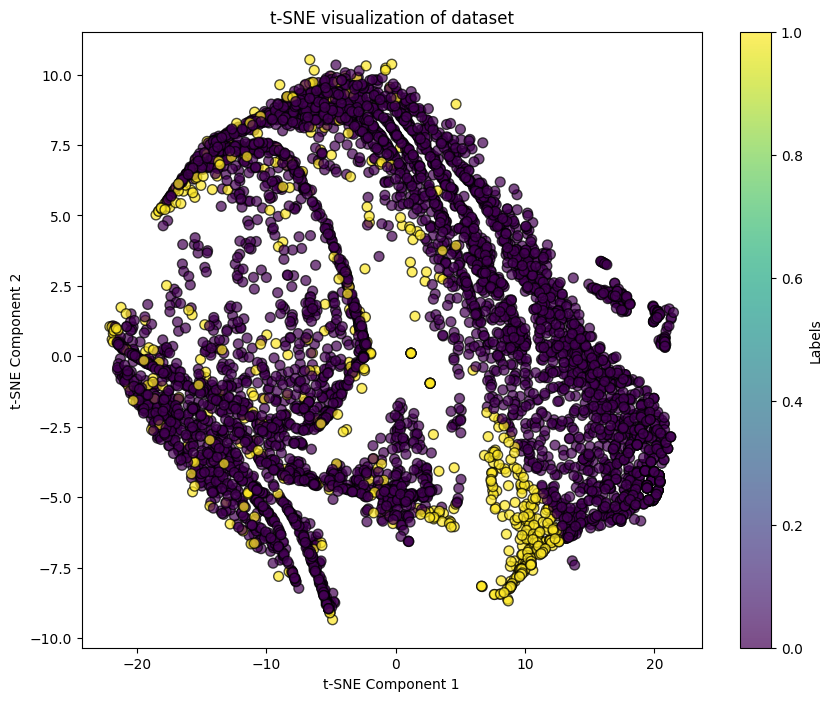

In [56]:
from sklearn.manifold import TSNE
# Create a t-SNE instance and fit_transform the data
tsne = TSNE(n_components=2, random_state=42, perplexity=500, n_iter=3000)
X_tsne = tsne.fit_transform(X)
print(tsne.kl_divergence_)

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y,cmap='viridis', alpha=0.7, edgecolors='k', s=50)

# Add legend and title
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Labels')

plt.show()

In [57]:
dataset_anom_lof=df_set1_level_1[df_set1_level_1.Anomaly_lof==1]
dataset_normal_lof=df_set1_level_1[df_set1_level_1.Anomaly_lof==0]
dataset_anom_scale_lof=df_scaled_data_level1[df_scaled_data_level1.Anomaly_lof==1]
dataset_normal_scale_lof=df_scaled_data_level1[df_scaled_data_level1.Anomaly_lof==0]

In [59]:
dataset_anom_lof.fillna(0,inplace=True)

/var/folders/nd/f34czdrj02175j4j_k03vfyw0000gp/T/ipykernel_10536/536698992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_anom_lof.fillna(0,inplace=True)


In [60]:
clusters=df_scaled_data_level1['Anomaly_lof'].values

In [61]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled_data_level1, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8016832236698974


In [ ]:
from sklearn.ensemble import RandomForestRegressor
lof_scores = dataset_anom_lof['Anomaly_score_lof'].values # Invert for easier interpretation


# Fit a Random Forest model on the LOF scores
rf_model = RandomForestRegressor()
rf_model.fit(dataset_anom_lof.drop(columns=['Anomaly_ind','Anomaly_score','Anomaly_lof','Anomaly_score_lof']), lof_scores)

# Use SHAP to explain the Random Forest model
explainer = shap.Explainer(rf_model, dataset_anom_lof)
shap_values_lof = explainer(dataset_anom_lof,check_additivity=False)

# Visualize SHAP values
shap.summary_plot(shap_values_lof, dataset_anom_lof,plot_type='bar')

In [ ]:
shap.plots.bar(shap_values_lof[25])

In [ ]:
for i in range(0,10):
    shap.plots.waterfall(shap_values_lof[i])

#RRCF

In [62]:
import numpy as np
import pandas as pd
import rrcf

n=5410
# Set forest parameters
num_trees = 100
tree_size = 256
sample_size_range = (n // tree_size, tree_size)

# Construct forest
forest = []
while len(forest) < num_trees:
    # Select random subsets of points uniformly
    ixs = np.random.choice(n, size=sample_size_range,
                           replace=False)
    # Add sampled trees to forest
    trees = [rrcf.RCTree(df_scaled_data_level1.iloc[ix].values, index_labels=ix)
             for ix in ixs]
    forest.extend(trees)

# Compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf)
                       for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index
df_scaled_data_level1['Anomaly_score_rrcf'] =avg_codisp
df_set1_level_1['Anomaly_score_rrcf']=avg_codisp



<Axes: >

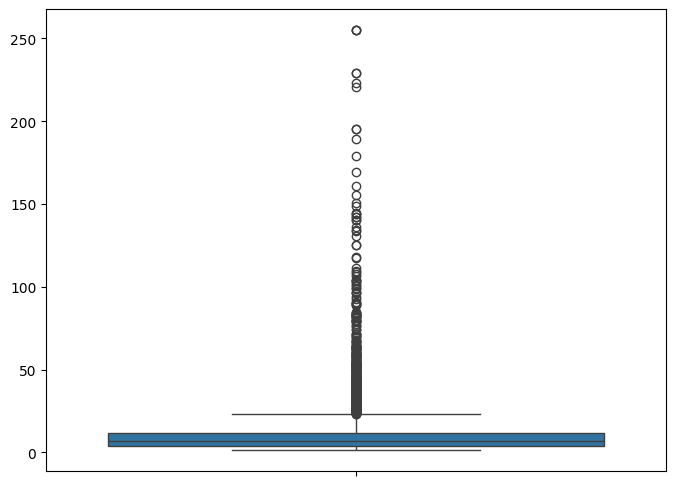

In [63]:
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.boxplot(data=avg_codisp)

In [64]:
df_scaled_data_level1['Anomaly_rrcf'] = df_scaled_data_level1['Anomaly_score_rrcf'].apply(lambda x: 1 if x >= 30.14 else 0)
df_set1_level_1['Anomaly_rrcf'] = df_set1_level_1['Anomaly_score_rrcf'].apply(lambda x: 1 if x >= 30.14 else 0)

In [65]:
X=df_scaled_data_level1.drop(columns='Anomaly_rrcf')
y=df_scaled_data_level1['Anomaly_rrcf']

/Users/Geethika/Documents/GitHub/Medicare Claims/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


0.8009215593338013


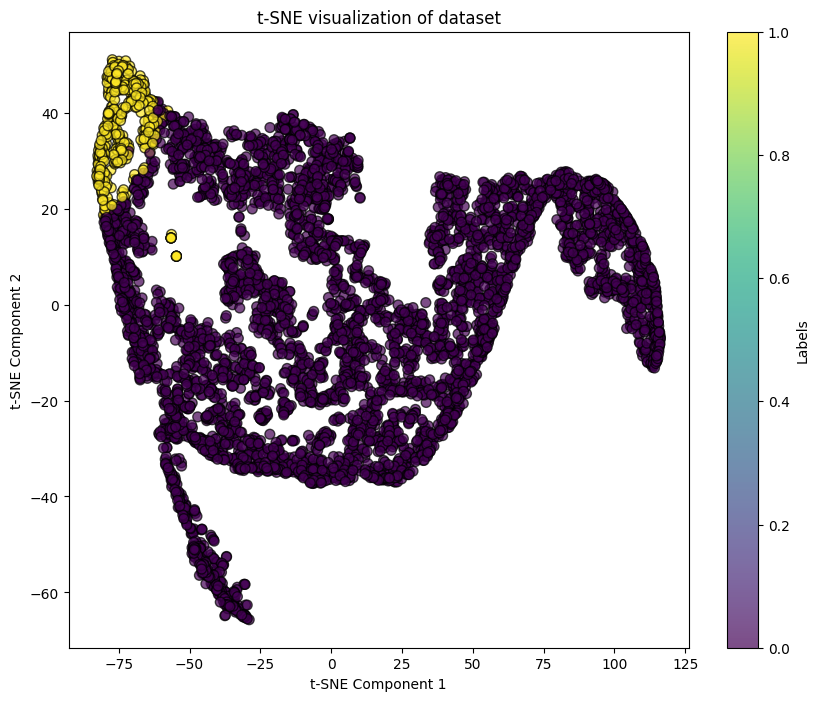

In [66]:
from sklearn.manifold import TSNE
# Create a t-SNE instance and fit_transform the data
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=3000)
X_tsne = tsne.fit_transform(X)
print(tsne.kl_divergence_)

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y,cmap='viridis', alpha=0.7, edgecolors='k', s=50)

# Add legend and title
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Labels')

plt.show()

In [67]:
dataset_anom_rrcf=df_set1_level_1[df_set1_level_1.Anomaly_rrcf==1]
dataset_normal_rrcf=df_set1_level_1[df_set1_level_1.Anomaly_rrcf==0]
dataset_anom_scale_rrcf=df_scaled_data_level1[df_scaled_data_level1.Anomaly_rrcf==1]
dataset_normal_scale_rrcf=df_scaled_data_level1[df_scaled_data_level1.Anomaly_rrcf==0]

In [68]:
dataset_anom_rrcf

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score,Anomaly_lof,Anomaly_score_lof,Anomaly_score_rrcf,Anomaly_rrcf
0,PRV57172,1760,340.0,121.0,14.0,88.0,10.0,1386100,1,-0.261794,0,-1.123871e+00,117.415000,1
1,PRV55158,698,129.0,47.0,2.0,29.0,4.0,508210,1,-0.111097,0,-1.043506e+00,61.920000,1
2,PRV54966,1796,283.0,59.0,5.0,0.0,0.0,502010,1,-0.181251,0,-1.051711e+00,89.136410,1
5,PRV54683,462,69.0,12.0,0.0,0.0,0.0,123850,0,0.034640,0,-1.055244e+00,53.823429,1
6,PRV54986,618,164.0,118.0,13.0,153.0,15.0,1693410,1,-0.250637,0,-1.181088e+00,43.240000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,PRV52638,1,0.0,0.0,0.0,0.0,0.0,400,0,0.187121,1,-2.466009e+06,254.800000,1
5338,PRV56539,1,1.0,0.0,0.0,0.0,0.0,900,0,0.188814,1,-3.460748e+00,62.933333,1
5359,PRV55879,2,0.0,0.0,0.0,0.0,0.0,90,0,0.187726,1,-2.490446e+05,169.566667,1
5396,PRV51751,2,0.0,0.0,0.0,0.0,0.0,900,0,0.188135,1,-1.849115e+01,140.500000,1


In [69]:
clusters=df_scaled_data_level1['Anomaly_rrcf'].values

In [70]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled_data_level1, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8685091925719814


In [71]:
dataset_anom_rrcf

,Provider,Clm_cnt_Provider_BeneID,Clm_cnt_Provider_OperatingPhysician,Clm_cnt_Provider_ClmDiagnosisCode_9,Clm_cnt_Provider_ClmDiagnosisCode_10,Clm_cnt_Provider_DiagnosisGroupCode,Clm_cnt_Provider_BeneID_OtherPhysician_ClmProcedureCode_1,PRV_TotalInscClaimAmtReimbursed,Anomaly_ind,Anomaly_score,Anomaly_lof,Anomaly_score_lof,Anomaly_score_rrcf,Anomaly_rrcf
0,PRV57172,1760,340.0,121.0,14.0,88.0,10.0,1386100,1,-0.261794,0,-1.123871e+00,117.415000,1
1,PRV55158,698,129.0,47.0,2.0,29.0,4.0,508210,1,-0.111097,0,-1.043506e+00,61.920000,1
2,PRV54966,1796,283.0,59.0,5.0,0.0,0.0,502010,1,-0.181251,0,-1.051711e+00,89.136410,1
5,PRV54683,462,69.0,12.0,0.0,0.0,0.0,123850,0,0.034640,0,-1.055244e+00,53.823429,1
6,PRV54986,618,164.0,118.0,13.0,153.0,15.0,1693410,1,-0.250637,0,-1.181088e+00,43.240000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,PRV52638,1,0.0,0.0,0.0,0.0,0.0,400,0,0.187121,1,-2.466009e+06,254.800000,1
5338,PRV56539,1,1.0,0.0,0.0,0.0,0.0,900,0,0.188814,1,-3.460748e+00,62.933333,1
5359,PRV55879,2,0.0,0.0,0.0,0.0,0.0,90,0,0.187726,1,-2.490446e+05,169.566667,1
5396,PRV51751,2,0.0,0.0,0.0,0.0,0.0,900,0,0.188135,1,-1.849115e+01,140.500000,1


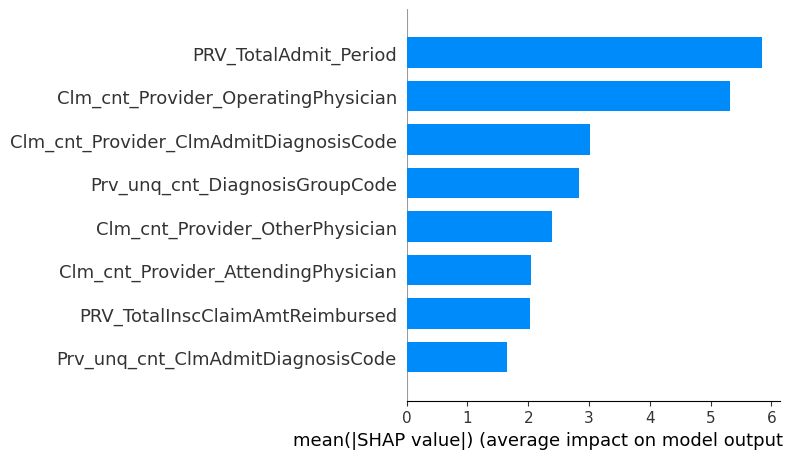

In [180]:
from sklearn.ensemble import RandomForestRegressor
rrcf_scores = dataset_anom_rrcf['Anomaly_score_rrcf'].values # Invert for easier interpretation


# Fit a Random Forest model on the LOF scores
rf_model = RandomForestRegressor()
rf_model.fit(dataset_anom_rrcf.drop(columns=['Provider','Anomaly_ind','Anomaly_score','Anomaly_lof','Anomaly_score_lof','Anomaly_rrcf','Anomaly_score_rrcf']), rrcf_scores)

# Use SHAP to explain the Random Forest model
explainer = shap.Explainer(rf_model, dataset_anom_rrcf.drop(columns=['Provider','Anomaly_ind','Anomaly_score','Anomaly_lof','Anomaly_score_lof','Anomaly_rrcf','Anomaly_score_rrcf']))
shap_values_rrcf = explainer(dataset_anom_rrcf.drop(columns=['Provider','Anomaly_ind','Anomaly_score','Anomaly_lof','Anomaly_score_lof','Anomaly_rrcf','Anomaly_score_rrcf']))


# Visualize SHAP values
shap.summary_plot(shap_values_rrcf, dataset_anom_rrcf.drop(columns=['Provider','Anomaly_ind','Anomaly_score','Anomaly_lof','Anomaly_score_lof','Anomaly_rrcf','Anomaly_score_rrcf']),plot_type='bar')